<a href="https://colab.research.google.com/github/NikhilJ2712/Data-Science/blob/main/Case_Study_01_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Importing Data using Pandas Function
df = pd.read_csv('Titanic.csv')
# It will print Shuffle 100% Dataset
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
686,male,14.0,4,1,39.6875,S,Third,child,False,0
290,female,26.0,0,0,78.8500,S,First,woman,True,1
674,male,NaN,0,0,0.0000,S,Second,man,True,0
20,male,35.0,0,0,26.0000,S,Second,man,True,0
356,female,22.0,0,1,55.0000,S,First,woman,False,1
...,...,...,...,...,...,...,...,...,...,...
778,male,NaN,0,0,7.7375,Q,Third,man,True,0
266,male,16.0,4,1,39.6875,S,Third,man,False,0
39,female,14.0,1,0,11.2417,C,Third,child,False,1
425,male,NaN,0,0,7.2500,S,Third,man,True,0


In [28]:
# Checking Information Of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [29]:
# Checking Null Values Information stats
df.isnull().sum()
# df.isnull().sum() : This code will give us number of missing values in each column.
# len(df) : This code will give us Total number rows present in dataset.

,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0
alone,0
survived,0


In [30]:
len(df)

891

In [31]:
'''

1. If Datacolumn having less than 5% of Missing Values, We can impute with Mean or Median in case of Numerical columns and Imputation with Mode will be for Categorical column.
2. If Datacolumn having Missing Values between 5% to 15% then random value can be imputed or better to replace with Median or Use KNN Imputer
3. If Datacolumn having more than 15% of Missing Values then we can drop that column.

'''
print(df.isnull().sum()/len(df)*100)

sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
class        0.000000
who          0.000000
alone        0.000000
survived     0.000000
dtype: float64


In [32]:
# Data Cleaning and Preprocessing
'''
1.
Based on Following Stats, We find that age column is Non Normal Distributed, Since, Mean =! Median
2.
Calculating Upper Bound Value and Lower Bound Value
Range = df['age'].quantile(0.25), df['age'].quantile(0.75)

'''
print(df['age'].agg(['mean','median']))
print( df['age'].quantile(0.25), df['age'].quantile(0.75))

mean      29.699118
median    28.000000
Name: age, dtype: float64
20.125 38.0


In [33]:
# Imputing age coloumn
df['age'].fillna(df['age'].median(), inplace = True)

In [34]:
df.isnull().sum()

,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0
alone,0
survived,0


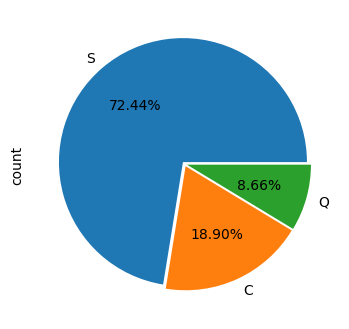

In [35]:
'''
Data Insight:
1. 72.44% People Board their jorney from Southampton
2. 18.90% People Board their jorney from Cherbourg
3. 8.66% People Board their jorney from Queenstown

'''
df['embarked'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%',explode = [0.02,0.02,0.02],figsize = (4,5))
plt.show()

In [36]:
# Imputing embarked coloumn
df['embarked'].fillna('S', inplace = True)

In [37]:
df.isnull().sum()

,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0
alone,0
survived,0


In [38]:
# Find out the People Data Who Boarded their Journey from Southhampton
Southhampton= df[df['embarked'] == 'S']
Southhampton

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
6,male,54.0,0,0,51.8625,S,First,man,True,0
...,...,...,...,...,...,...,...,...,...,...
883,male,28.0,0,0,10.5000,S,Second,man,True,0
884,male,25.0,0,0,7.0500,S,Third,man,True,0
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1


In [39]:
Southhampton['sex'].value_counts()

,count
sex,
male,441
female,205


In [40]:
Southhampton['survived'].value_counts()

,count
survived,
0,427
1,219


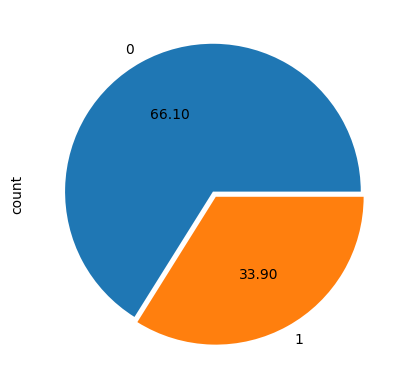

In [41]:
'''
Data Insights For Southhampton
1. 66.10% People Died where as 33.90% people Survived.
2. 441 people were reported as Male and 219 were Female
3. Out of 441 Male 77 People were Survied, where as Out of 219 Females 142 were Survied
4. Survival rate For Males (77/441 = 17.46%) and for Females (142/219 = 64.84%)

'''
Southhampton['survived'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [42]:
# Survival rate in male Southhampton
Southhampton[(Southhampton['sex'] == 'male') & (Southhampton['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
17,male,28.00,0,0,13.0000,S,Second,man,True,1
21,male,34.00,0,0,13.0000,S,Second,man,True,1
23,male,28.00,0,0,35.5000,S,First,man,True,1
55,male,28.00,0,0,35.5000,S,First,man,True,1
74,male,32.00,0,0,56.4958,S,Third,man,True,1
...,...,...,...,...,...,...,...,...,...,...
821,male,27.00,0,0,8.6625,S,Third,man,True,1
831,male,0.83,1,1,18.7500,S,Second,child,False,1
838,male,32.00,0,0,56.4958,S,Third,man,True,1
857,male,51.00,0,0,26.5500,S,First,man,True,1


In [43]:
# Survival rate in female Southhampton
Southhampton[(Southhampton['sex'] == 'female') & (Southhampton['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
8,female,27.0,0,2,11.1333,S,Third,woman,False,1
10,female,4.0,1,1,16.7000,S,Third,child,False,1
11,female,58.0,0,0,26.5500,S,First,woman,True,1
...,...,...,...,...,...,...,...,...,...,...
862,female,48.0,0,0,25.9292,S,First,woman,True,1
865,female,42.0,0,0,13.0000,S,Second,woman,True,1
871,female,47.0,1,1,52.5542,S,First,woman,False,1
880,female,25.0,0,1,26.0000,S,Second,woman,False,1


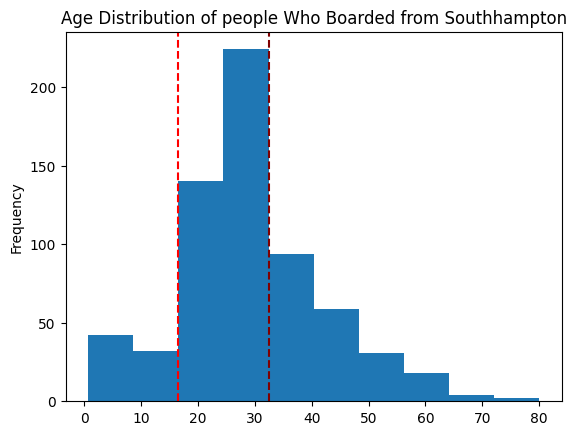

In [44]:
Southhampton['age'].plot(kind = 'hist')
plt.title('Age Distribution of people Who Boarded from Southhampton')
plt.axvline(16.5,linestyle = '--', color = 'red')
plt.axvline(32.5,linestyle = '--', color = 'maroon')
plt.show()

In [47]:
Southhampton['class'].value_counts()

,count
class,
Third,353
Second,164
First,129


In [48]:
First_Class = Southhampton[Southhampton['class'] == 'First']
Second_Class = Southhampton[Southhampton['class'] == 'Second']
Third_Class = Southhampton[Southhampton['class'] == 'Third']

In [49]:
First_Class['survived'].value_counts()

,count
survived,
1,76
0,53


In [50]:
Second_Class['survived'].value_counts()

,count
survived,
0,88
1,76


In [51]:
Third_Class['survived'].value_counts()

,count
survived,
0,286
1,67


In [45]:
# Find out the People Data Who Boarded their Journey from Queenstown

In [46]:
# Find out the People Data Who Boarded their Journey from Cherbourge